In [24]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pysal.explore import esda
from esda.moran import Moran, Moran_Local
from pysal.lib import weights
from shapely.ops import unary_union

In [12]:
## Load Data

gdf_lsoa = gpd.read_file("Data/manchester_lsoa/manchester_lsoa.shp")
gdf_supply_demand = gpd.read_file("Data/supply_demand_sorted/pt_supply_demand_sorted.shp")
drt_zones = gpd.read_file("Data/LocalLink_MapData/SHP-format/Locallink_Areas.shp")

In [3]:
gdf_supply_demand

,n_lsoa,lsoa21cd,lsoa21nm,nearest_st,bus_stops_,nearest__1,bus_stop_1,pt_supply,area_sqkm,Total,...,elderly__1,child_pe_1,pop_dens_n,dis-car_no,pt_demand,pt_supply_,pt_demand_,demand_sup,diff_rank,geometry
0,437,E01005754,Stockport 004B,355.420109,24.552039,0.049804,0.065530,0.057667,0.448028,2019,...,0.220026,0.418846,4.532650e-10,0.970109,0.402245,0.110287,0.933523,0.823236,1,"POLYGON ((390607.548 393101.450, 390611.942 39..."
1,1454,E01005756,Stockport 004D,153.017453,11.381488,0.021442,0.030377,0.025910,0.615034,2376,...,0.147363,0.493663,3.885690e-10,0.758152,0.349794,0.049552,0.811796,0.762244,2,"POLYGON ((390827.813 393516.000, 390829.198 39..."
2,995,E01005289,Manchester 049D,207.964074,26.321723,0.029142,0.070253,0.049697,0.227949,1683,...,0.451189,0.428883,7.426230e-10,0.581522,0.365399,0.095046,0.848011,0.752965,3,"POLYGON ((383386.000 388155.000, 383384.408 38..."
3,1307,E01005631,Salford 020A,197.537084,93.283093,0.027680,0.248975,0.138328,0.278721,1601,...,0.565878,0.174594,5.777530e-10,0.934783,0.418813,0.264549,0.971975,0.707426,4,"POLYGON ((378030.813 399258.268, 378041.342 39..."
4,75,E01006386,Wigan 009C,669.109129,63.743184,0.093761,0.170132,0.131946,0.235319,1582,...,0.467545,0.276219,6.761920e-10,0.891304,0.408767,0.252346,0.948660,0.696314,5,"POLYGON ((358866.505 406020.287, 358866.863 40..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1659,E01006303,Wigan 040B,7136.336919,9.714181,1.000000,0.025927,0.512964,2.470615,1620,...,0.517365,0.312330,6.595200e-11,0.086957,0.229163,0.981036,0.531837,-0.449198,1697,"POLYGON ((363350.507 399570.265, 363351.812 39..."
1697,1620,E01006302,Wigan 040A,7089.707293,6.119850,0.993466,0.016334,0.504900,0.980416,1830,...,0.352764,0.345128,1.877420e-10,0.095109,0.198250,0.965614,0.460096,-0.505518,1698,"POLYGON ((364308.400 397256.400, 364288.885 39..."
1698,393,E01005016,Bury 001C,6410.793433,42.207358,0.898331,0.112652,0.505492,0.379081,1479,...,0.347707,0.299044,3.924260e-10,0.127717,0.193617,0.966746,0.449343,-0.517403,1699,"POLYGON ((378738.996 417171.726, 378769.188 41..."
1699,541,E01032909,Salford 033F,471.232313,245.461799,0.066033,0.655143,0.360588,0.142588,1723,...,0.006350,0.022589,1.215408e-09,0.201087,0.057507,0.689619,0.133460,-0.556159,1700,"POLYGON ((383832.622 398865.622, 383832.250 39..."


Text(0.5, 1.0, 'Supply-Demand Index Distribution')

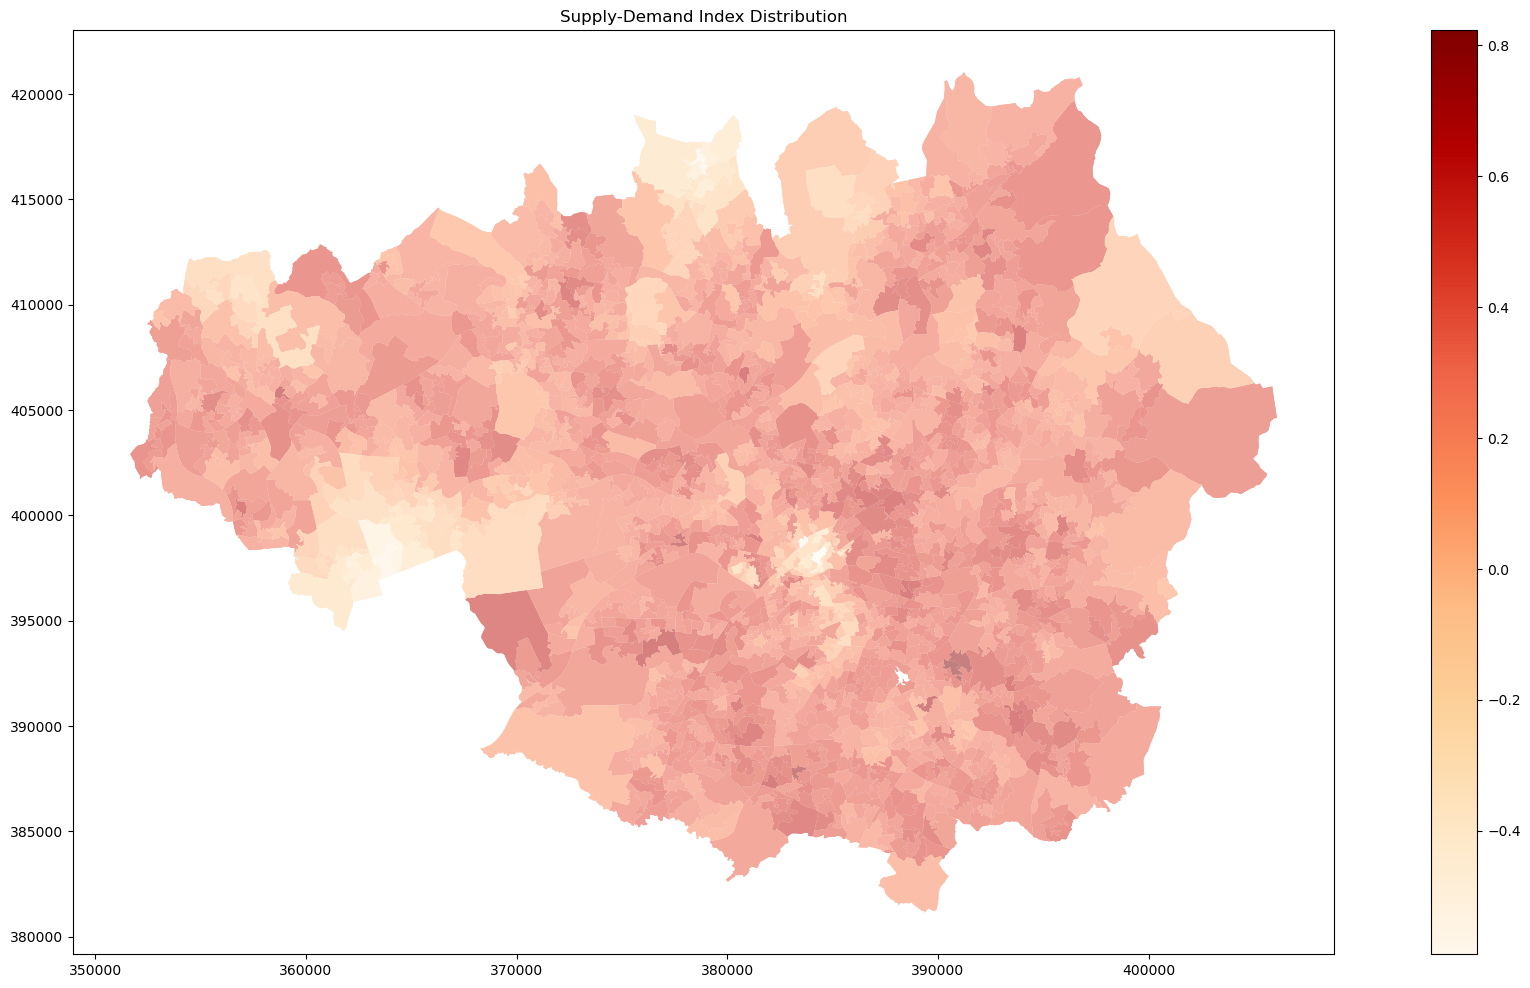

In [5]:
fig, axes = plt.subplots(1,1 , figsize=(25, 12))

gdf_supply_demand.plot(ax=axes, column="demand_sup", cmap="OrRd", legend=True)
gdf_lsoa.plot(ax=axes, facecolor="white", alpha=0.5, edgecolor="none", linewidth=0.5)
axes.set_title("Supply-Demand Index Distribution")

## Global Moran's I

In [6]:
## Defining Weight
w = weights.Queen.from_dataframe(gdf_supply_demand)
w.transform = "r"

In [15]:
## Calculate Global Moran's I
y = gdf_supply_demand["demand_sup"].values
moran = Moran(y,w)

print(f"Moran's I: {moran.I}")
print(f"Expected value: {moran.EI}")
print(f"Variance: {moran.VI_norm}")
print(f"Z-score: {moran.z_norm}")
print(f"P-value: {moran.p_norm}")

Moran's I: 0.6586177232190279
Expected value: -0.000588235294117647
Variance: 0.00020685741640224446
Z-score: 45.83376948469715
P-value: 0.0


## Local Moran's I

In [16]:
## Calculate Local Moran's I for each LSOA
moran_local = Moran_Local(y,w)

## Create new column to store the local moran's I value and its p_value
gdf_supply_demand["local_moran"] = moran_local.Is
gdf_supply_demand["local_moran_p"] = moran_local.p_sim

In [17]:
gdf_supply_demand

,n_lsoa,lsoa21cd,lsoa21nm,nearest_st,bus_stops_,nearest__1,bus_stop_1,pt_supply,area_sqkm,Total,...,pop_dens_n,dis-car_no,pt_demand,pt_supply_,pt_demand_,demand_sup,diff_rank,geometry,local_moran,local_moran_p
0,437,E01005754,Stockport 004B,355.420109,24.552039,0.049804,0.065530,0.057667,0.448028,2019,...,4.532650e-10,0.970109,0.402245,0.110287,0.933523,0.823236,1,"POLYGON ((390607.548 393101.450, 390611.942 39...",3.764252,0.001
1,1454,E01005756,Stockport 004D,153.017453,11.381488,0.021442,0.030377,0.025910,0.615034,2376,...,3.885690e-10,0.758152,0.349794,0.049552,0.811796,0.762244,2,"POLYGON ((390827.813 393516.000, 390829.198 39...",3.478514,0.001
2,995,E01005289,Manchester 049D,207.964074,26.321723,0.029142,0.070253,0.049697,0.227949,1683,...,7.426230e-10,0.581522,0.365399,0.095046,0.848011,0.752965,3,"POLYGON ((383386.000 388155.000, 383384.408 38...",1.868730,0.025
3,1307,E01005631,Salford 020A,197.537084,93.283093,0.027680,0.248975,0.138328,0.278721,1601,...,5.777530e-10,0.934783,0.418813,0.264549,0.971975,0.707426,4,"POLYGON ((378030.813 399258.268, 378041.342 39...",1.428749,0.060
4,75,E01006386,Wigan 009C,669.109129,63.743184,0.093761,0.170132,0.131946,0.235319,1582,...,6.761920e-10,0.891304,0.408767,0.252346,0.948660,0.696314,5,"POLYGON ((358866.505 406020.287, 358866.863 40...",0.232525,0.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1659,E01006303,Wigan 040B,7136.336919,9.714181,1.000000,0.025927,0.512964,2.470615,1620,...,6.595200e-11,0.086957,0.229163,0.981036,0.531837,-0.449198,1697,"POLYGON ((363350.507 399570.265, 363351.812 39...",14.688558,0.001
1697,1620,E01006302,Wigan 040A,7089.707293,6.119850,0.993466,0.016334,0.504900,0.980416,1830,...,1.877420e-10,0.095109,0.198250,0.965614,0.460096,-0.505518,1698,"POLYGON ((364308.400 397256.400, 364288.885 39...",18.769470,0.001
1698,393,E01005016,Bury 001C,6410.793433,42.207358,0.898331,0.112652,0.505492,0.379081,1479,...,3.924260e-10,0.127717,0.193617,0.966746,0.449343,-0.517403,1699,"POLYGON ((378738.996 417171.726, 378769.188 41...",17.974562,0.001
1699,541,E01032909,Salford 033F,471.232313,245.461799,0.066033,0.655143,0.360588,0.142588,1723,...,1.215408e-09,0.201087,0.057507,0.689619,0.133460,-0.556159,1700,"POLYGON ((383832.622 398865.622, 383832.250 39...",9.394580,0.001


In [18]:
## Set significance level
significance_level = 0.05

## Identify significant clusters and outliers
gdf_supply_demand["significant"] = gdf_supply_demand["local_moran_p"] < significance_level

## Differentiate between high-high, low-low, high-low, and low-high clusters
gdf_supply_demand["cluster_type"] = "Not Significant"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] > 0) & (y > y.mean()), "cluster_type"] = "High-High"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] > 0) & (y < y.mean()), "cluster_type"] = "Low-Low"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] < 0) & (y > y.mean()), "cluster_type"] = "High-Low"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] < 0) & (y < y.mean()), "cluster_type"] = "Low-High"

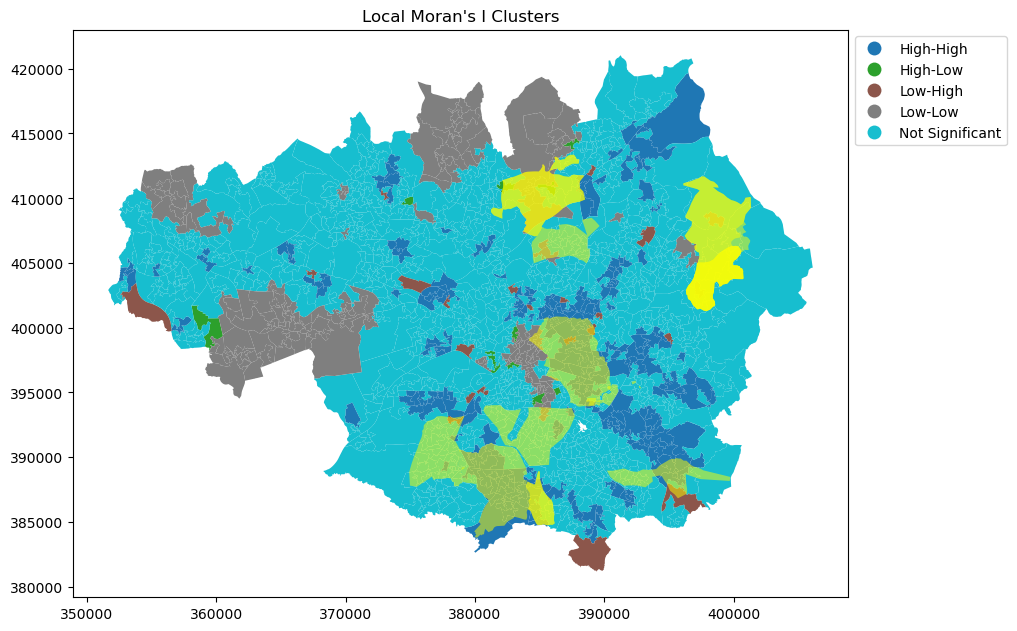

In [22]:
# Plot the clusters
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_supply_demand.plot(ax=ax, column="cluster_type", categorical=True, legend=True,
         legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"})

drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5)
plt.title("Local Moran\'s I Clusters")
plt.show()

## Extract High-High Areas

In [27]:
## Filter only High-High areas
high_high = gdf_supply_demand[gdf_supply_demand["cluster_type"] == "High-High"]

In [28]:
## Merge neighboring High-High areas into single polygons
high_high_union = high_high.geometry.unary_union

In [33]:
## Create a new gdf from the merged High-High areas
high_high_zones = gpd.GeoDataFrame(geometry=[high_high_union], crs=gdf_supply_demand.crs)
high_high_zones.to_file("Data/proposed_zones/high_high.shp")

<Axes: >

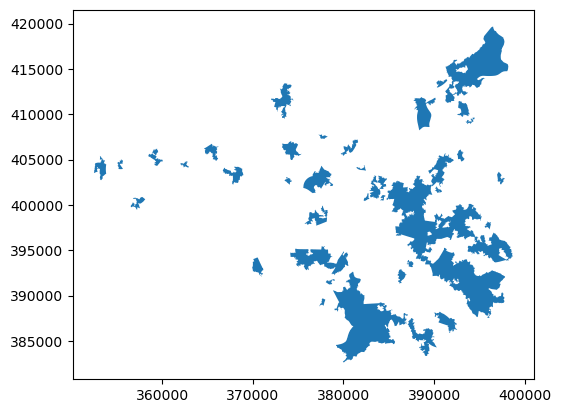